In [13]:
import os
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot
from matplotlib import dates

import matplotlib.dates as mdates
import matplotlib.ticker as plticker
from matplotlib.dates import DateFormatter
import time



cw = pd.read_csv('ged191.csv')

#Drop unwanted columns 

drop_these = ['id','low', 'high', 'event_clarity', 'date_prec', 'conflict_new_id', 
              'conflict_name','dyad_name', 'dyad_new_id','side_a_new_id','adm_1','adm_2', 'gwnoa', 'side_b_new_id', 'dyad_new_id', 'gwnob', 'number_of_sources'
              , 'source_headline', 'priogrid_gid', 'source_date', 'source_office', 'source_article', 
              'source_original', 'deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown', 'date_start', 
              'date_end', 'country_id', 'side_a', 'side_b', 'where_prec', 'type_of_violence', 'active_year']


cw.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made


cw_year = cw[cw.year == 2018]



In [14]:
# I create dummy variables for regions:
region_dummy = pd.get_dummies(cw_year['region'])
# I merge the two dataframes:
cw_year = pd.concat([cw_year, region_dummy], axis=1)
cw_year.head()

,year,where_coordinates,latitude,longitude,geom_wkt,country,region,best,Africa,Americas,Asia,Europe,Middle East
2010,2018,Qush Tepa district,36.193552,65.352724,POINT (65.352724 36.193552),Afghanistan,Asia,45,0,0,1,0,0
2011,2018,Imam Sahib district,37.105713,68.851658,POINT (68.851658 37.105713),Afghanistan,Asia,28,0,0,1,0,0
2012,2018,Bala Bagh village,34.389900,70.227900,POINT (70.227900 34.389900),Afghanistan,Asia,7,0,0,1,0,0
2013,2018,Khaki Safed district,32.755167,62.073124,POINT (62.073124 32.755167),Afghanistan,Asia,23,0,0,1,0,0
2014,2018,Khwaja Sabz Posh district,36.055429,64.978235,POINT (64.978235 36.055429),Afghanistan,Asia,16,0,0,1,0,0


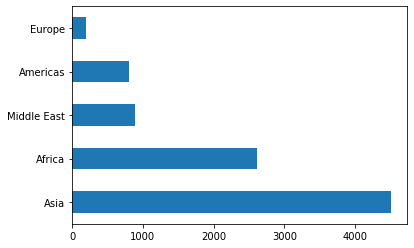

In [15]:

cw_year['region'].value_counts()

Asia = cw_year['region'].value_counts().plot(kind='barh')


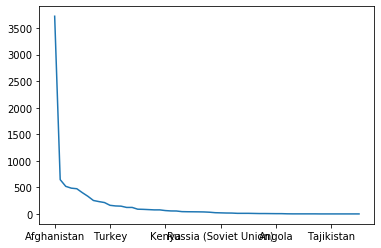

In [16]:
cw_year['country'].value_counts().plot()

In [11]:
cw_year['country'].value_counts()

Afghanistan                 3722
Mexico                       646
Nigeria                      520
Somalia                      486
India                        475
DR Congo (Zaire)             401
Yemen (North Yemen)          333
Iraq                         254
Cameroon                     233
Mali                         215
Turkey                       163
Ukraine                      151
South Sudan                  147
Philippines                  123
Libya                        123
Sudan                         90
Brazil                        87
Egypt                         82
Pakistan                      77
Central African Republic      77
Kenya                         64
Colombia                      57
Ethiopia                      56
Mozambique                    44
Burkina Faso                  42
Myanmar (Burma)               41
Thailand                      40
Burundi                       38
Israel                        33
Niger                         24
Russia (So

In [17]:
# Grouping by 'Date' I can make a timeline plotting number of outbreaks pr. day:
grouped = cw_year.groupby('country')

cw_year_count = grouped.count()
cw_year_grouped = grouped.sum()

cw_year_grouped['Armed conflicts'] = cw_year_count['best']
cw_year_grouped.reset_index(inplace=True)

print('Countries:', len(cw_year_grouped))
cw_year_grouped.head(5)

Countries: 56


,country,year,latitude,longitude,best,Africa,Americas,Asia,Europe,Middle East,Armed conflicts
0,Afghanistan,7510996,126886.348193,250988.722889,26888,0.0,0.0,3722.0,0.0,0.0,3722
1,Algeria,20180,348.247775,45.884229,35,10.0,0.0,0.0,0.0,0.0,10
2,Angola,12108,-47.908549,101.475650,24,6.0,0.0,0.0,0.0,0.0,6
3,Armenia,2018,40.854687,45.577810,1,0.0,0.0,0.0,1.0,0.0,1
4,Australia,4036,-75.627222,289.926112,2,0.0,0.0,2.0,0.0,0.0,2


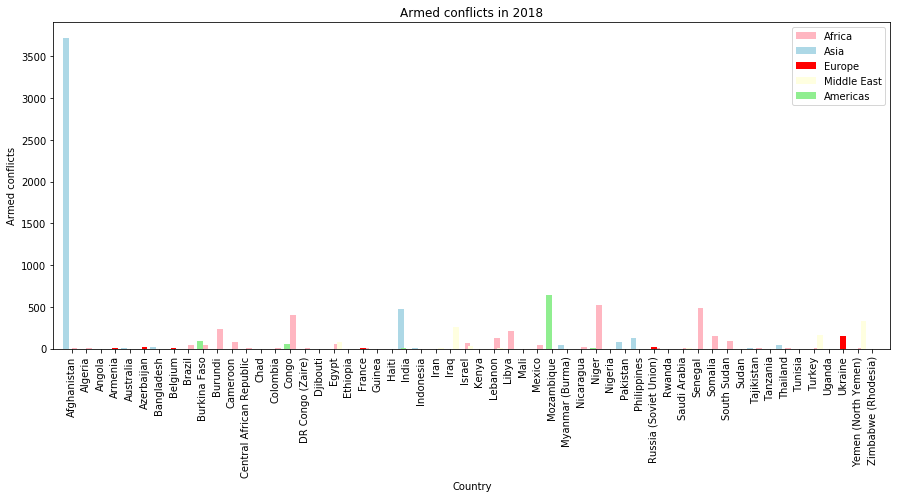

In [18]:
fig, ax = plt.subplots(figsize = (15,6))
fig = cw_year_grouped.plot(x="country", y=["Africa" , "Asia", "Europe", "Middle East", "Americas"], kind="bar", color=['lightpink', 'lightblue', 'red' , 'lightyellow', 'lightgreen'], width=2, ax=ax)

x = cw_year_grouped['country']

plt.title('Armed conflicts in 2018')
plt.ylabel('Armed conflicts')
plt.xlabel('Country')

plt.show()